In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
sns.set()
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('all_prep_new.csv')
df.isna().any()

/home/keddy/miniconda/envs/librs/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


book_index1             False
book_index2             False
CDC_code                False
ISBN                     True
identifier              False
borrow_date             False
expexted_return_date    False
return_date             False
people_id                True
title                    True
create_date             False
publisher                True
dtype: bool

In [3]:
# na -> 討論室 ...
df.dropna(inplace=True, subset=['ISBN', 'CDC_code'])
df['1st_cdc'] = df['CDC_code'].apply(lambda x: x.split(' ')[0].split('.')[0])
df.isna().any()

book_index1             False
book_index2             False
CDC_code                False
ISBN                    False
identifier              False
borrow_date             False
expexted_return_date    False
return_date             False
people_id                True
title                    True
create_date             False
publisher                True
category                False
dtype: bool

In [4]:
print(df.columns)
df

Index(['book_index1', 'book_index2', 'CDC_code', 'ISBN', 'identifier',
       'borrow_date', 'expexted_return_date', 'return_date', 'people_id',
       'title', 'create_date', 'publisher', 'category'],
      dtype='object')


,book_index1,book_index2,CDC_code,ISBN,identifier,borrow_date,expexted_return_date,return_date,people_id,title,create_date,publisher,category
0,4990001,C00524970,857.7 844:3-6,(平裝),Q223600906,20061002,20061025,20061025,Q223600906,我城(平裝)西西 著.允晨,20000629,允晨,857
1,4990001,C00524970,857.7 844:3-6,(平裝),T221009995,20060330,20060608,20060608,892260004,我城(平裝)西西 著.允晨,20000629,允晨,857
2,4990001,C02629541,857.7 844:3-6,(平裝),S123597324,20060219,20060316,20060316,492125050,我城(平裝)西西 著.允晨,20000629,允晨,857
3,4990001,C02629541,857.7 844:3-6,(平裝),S123597324,20060316,20060418,20060418,492125050,我城(平裝)西西 著.允晨,20000629,允晨,857
4,4990009,C01037868,873.57 7975-5,(精裝),Q122657089,20061019,20061112,20061112,492530055,塊肉餘生錄 /(精裝)狄更斯 (Dickens Charles) 18121870.文化,19940107,NaN,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242257,6496373,C05680147,528.2 8457:4,9789573280071,D220312301L,20171226,20191231,0,D220312301L,孩子永遠是對的 : 幫助父母掙脫臍帶勒索找出孩子的正向價值,20171222,NaN,528
2242258,6497547,C06230396,947.45 856-4,978-986-213-707-9,D220312301L,20171229,20191231,0,D220312301L,四季 = Four seasons,20171227,NaN,947
2242259,6497548,C05680215,855 856:12-34,978-986-213-753-6,D220312301L,20171229,20191231,0,D220312301L,忽遠忽近 = So close yet so far,20171227,NaN,855
2242260,6497549,C05680237,855 856:12-33,978-986-213-604-1,D220312301L,20171229,20191231,0,D220312301L,忘記親一下 = Kiss & Goodbye,20171227,NaN,855


In [5]:
print(f'numbers of people: {len(df["people_id"].unique())}')
print(f'numbers of books: {len(df["title"].unique())}')

numbers of people: 40239
numbers of books: 202573


<AxesSubplot:xlabel='category', ylabel='number of borrowings'>

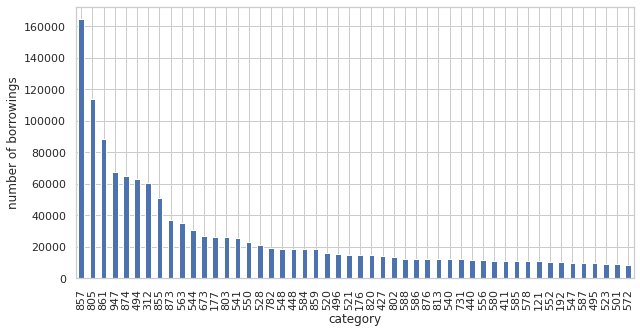

In [6]:
category = df.groupby('1st_cdc').count().nlargest(50, 'title')
category['title'].plot(ylabel='number of borrowings', kind='bar', figsize=(10, 5))

<AxesSubplot:xlabel='date', ylabel='numbers of books'>

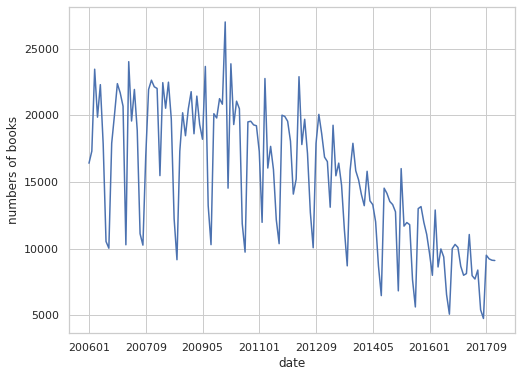

In [7]:
df['month'] = df['borrow_date'].apply(lambda x: str(x)[:6])
borrow_date = df.groupby('month').count()
borrow_date['title'].plot(kind='line', ylabel='numbers of books', xlabel='date', figsize=(8, 6))

Text(0, 0.5, 'numbers of people (log10)')

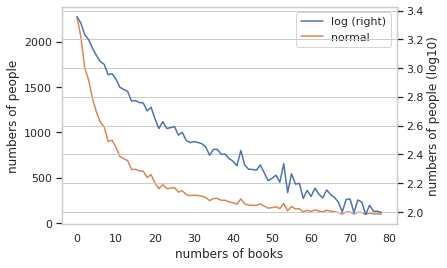

In [8]:
peo_cnt = df.groupby('people_id').count()['ISBN']
peo_cnt = peo_cnt.groupby(peo_cnt.values).count()
peo_cnt = peo_cnt[peo_cnt.index < 80]

peo_df = pd.DataFrame({'log': np.log10(peo_cnt.values), 'normal': peo_cnt.values})
ax = peo_df.plot(kind='line', xlabel='numbers of books',secondary_y="log", ylabel='numbers of people', figsize=(6, 4))
ax.right_ax.set_ylabel('numbers of people (log10)')


Text(0, 0.5, 'numbers of books (log10)')

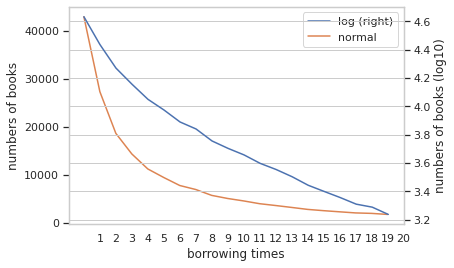

In [9]:
book_cnt = df.groupby('title').count()['book_index1']
book_cnt = book_cnt.groupby(book_cnt.values).count()
book_cnt = book_cnt[book_cnt.index < 21]
book_df = pd.DataFrame({'log': np.log10(book_cnt.values), 'normal': book_cnt.values})
ax = book_df.plot(kind='line', xlabel='borrowing times', xticks=range(1, 21),secondary_y="log", ylabel='numbers of books', figsize=(6, 4))
ax.right_ax.set_ylabel('numbers of books (log10)')

In [10]:
book_cnt = df.groupby('title').count()['book_index1']
book_cnt.nlargest(20).to_dict()

{'獵命師傳奇 = Fatehunter': 4568,
 '烏龍派出所': 2478,
 'One piece航海王': 2415,
 '盜墓筆記': 2414,
 '笑傲江湖': 2371,
 '鹿鼎記': 2313,
 '天龍八部': 2225,
 '名偵探柯南': 2065,
 '東大特訓班 /9574737578(第1冊:平裝)三田紀房臺灣東販發行': 2051,
 '射鵰英雄傳': 1991,
 '神鵰俠侶': 1743,
 '美味大挑戰': 1718,
 '禁咒師': 1611,
 '微積分': 1335,
 '大使閣下的料理人': 1313,
 '鬼吹燈': 1292,
 '火影忍者': 1263,
 '統計學': 1190,
 '少年陰陽師': 1165,
 '大唐雙龍傳': 1113}

In [11]:
item_df = pd.read_csv('item_all_new.csv')
item_df = item_df.set_index('book_index1')


/home/keddy/miniconda/envs/librs/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
item_df['1st_cdc'] = item_df['CDC_code'].apply(lambda x: x.split(' ')[0].split('.')[0])
# item_df['2nd_cdc'] = item_df['CDC_code'].apply(lambda x: x.split(' ')[0].split('.')[1])

In [13]:
print(len(item_df['1st_cdc'].unique()))
print(len(df['1st_cdc'].unique()))

940
901


<AxesSubplot:xlabel='category', ylabel='numbers of books'>

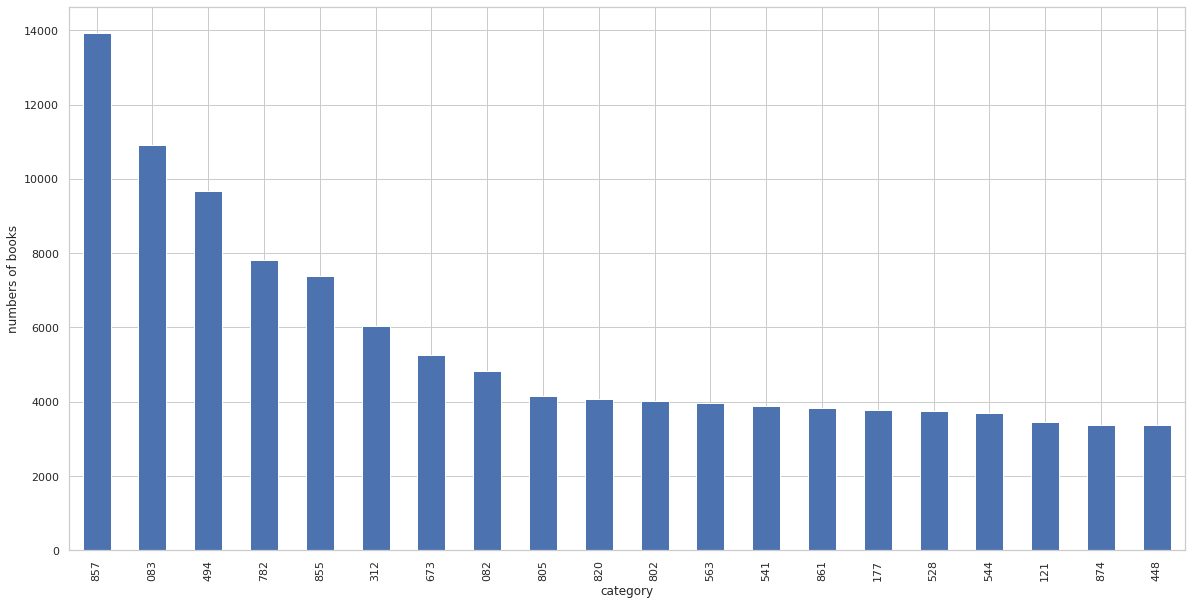

In [16]:
item_df.groupby('1st_cdc')['title'].count().nlargest(20).plot(kind='bar', xlabel='category', figsize=(20, 10), ylabel='numbers of books')